In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [75]:
dataset =pd.read_csv("/content/aids.csv")
dataset

,Unnamed: 0,year,death
0,1,1983,0
1,2,1983,2
2,3,1983,5
3,4,1983,8
4,5,1983,11
...,...,...,...
565,566,1992,29
566,567,1992,32
567,568,1992,35
568,569,1992,38


In [76]:
dataset.drop('Unnamed: 0',axis=1, inplace=True)
dataset

,year,death
0,1983,0
1,1983,2
2,1983,5
3,1983,8
4,1983,11
...,...,...
565,1992,29
566,1992,32
567,1992,35
568,1992,38


DATA PREPROCESSING

In [77]:
x =dataset.iloc[: ,:-1].values
y =dataset.iloc[: , -1].values

In [78]:
x

array([[1983],
       [1983],
       [1983],
       [1983],
       [1983],
       [1983],
       [1983],
       [1983],
       [1983],
       [1983],
       [1983],
       [1983],
       [1983],
       [1983],
       [1983],
       [1983],
       [1983],
       [1983],
       [1983],
       [1983],
       [1983],
       [1983],
       [1983],
       [1983],
       [1983],
       [1983],
       [1983],
       [1983],
       [1983],
       [1983],
       [1984],
       [1984],
       [1984],
       [1984],
       [1984],
       [1984],
       [1984],
       [1984],
       [1984],
       [1984],
       [1984],
       [1984],
       [1984],
       [1984],
       [1984],
       [1984],
       [1984],
       [1984],
       [1984],
       [1984],
       [1984],
       [1984],
       [1984],
       [1984],
       [1984],
       [1984],
       [1984],
       [1984],
       [1984],
       [1984],
       [1984],
       [1984],
       [1984],
       [1984],
       [1984],
       [1984],
       [19

In [79]:
y

array([ 0,  2,  5,  8, 11, 14, 17, 20, 23, 26, 29, 32, 35, 38, 41,  0,  2,
        5,  8, 11, 14, 17, 20, 23, 26, 29, 32, 35, 38, 41,  0,  2,  5,  8,
       11, 14, 17, 20, 23, 26, 29, 32, 35, 38, 41,  0,  2,  5,  8, 11, 14,
       17, 20, 23, 26, 29, 32, 35, 38, 41,  0,  2,  5,  8, 11, 14, 17, 20,
       23, 26, 29, 32, 35, 38, 41,  0,  2,  5,  8, 11, 14, 17, 20, 23, 26,
       29, 32, 35, 38, 41,  0,  2,  5,  8, 11, 14, 17, 20, 23, 26, 29, 32,
       35, 38, 41,  0,  2,  5,  8, 11, 14, 17, 20, 23, 26, 29, 32, 35, 38,
       41,  0,  2,  5,  8, 11, 14, 17, 20, 23, 26, 29, 32, 35, 38, 41,  0,
        2,  5,  8, 11, 14, 17, 20, 23, 26, 29, 32, 35, 38, 41,  0,  2,  5,
        8, 11, 14, 17, 20, 23, 26, 29, 32, 35, 38, 41,  0,  2,  5,  8, 11,
       14, 17, 20, 23, 26, 29, 32, 35, 38, 41,  0,  2,  5,  8, 11, 14, 17,
       20, 23, 26, 29, 32, 35, 38, 41,  0,  2,  5,  8, 11, 14, 17, 20, 23,
       26, 29, 32, 35, 38, 41,  0,  2,  5,  8, 11, 14, 17, 20, 23, 26, 29,
       32, 35, 38, 41,  0

SPLITTING DATA INTO TRAIN AND TEST

In [80]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

In [81]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

PREDICTING THE TEST SET RESULT

In [82]:
y_pred = regressor.predict(x_test)

VISUALISING TESTING RESULT

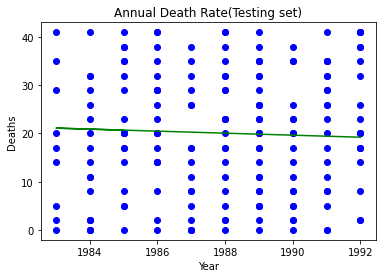

In [83]:
plt.scatter(x_test, y_test, color = 'blue')
plt.plot(x_train, regressor.predict(x_train), color = 'green')
plt.title('Annual Death Rate(Testing set)')
plt.xlabel('Year')
plt.ylabel('Deaths')
plt.show()

VISUALISING TRAINING RESULTS

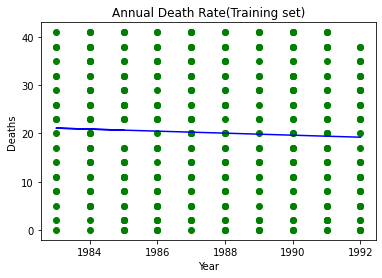

In [84]:
plt.scatter(x_train, y_train, color = 'green')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('Annual Death Rate(Training set)')
plt.xlabel('Year')
plt.ylabel('Deaths')
plt.show()

APPLYING POLYNOMIAL REGRESSION

In [85]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree =3)
x_poly = poly_reg.fit_transform(x)
poly_reg.fit(x_poly ,y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly ,y)

LinearRegression()

VISUALISING THE RESULT

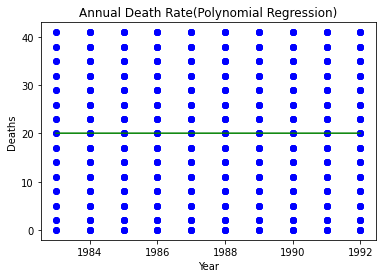

In [86]:
plt.scatter(x,y,color = "blue")
plt.plot(x ,lin_reg_2.predict(poly_reg.fit_transform(x)), color ="green")
plt.title("Annual Death Rate(Polynomial Regression)")
plt.xlabel("Year")
plt.ylabel("Deaths")
plt.show()

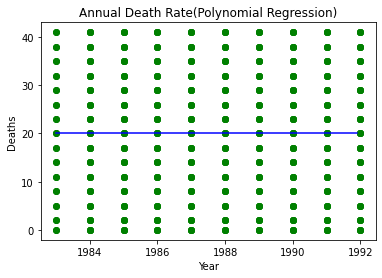

In [88]:
x_grid =np.arange(min(x) ,max(x) ,0.1)
x_grid =x_grid.reshape((len(x_grid), 1))
plt.scatter(x , y,color="green")
plt.plot(x_grid ,lin_reg_2.predict(poly_reg.fit_transform(x_grid)), color="blue")
plt.title("Annual Death Rate(Polynomial Regression)")
plt.xlabel("Year")
plt.ylabel("Deaths")
plt.show()

PREDICTION THE RESULTS

In [89]:
y_pred =regressor.predict([[1993]])
print("Annual Death Rate in 1993 is =")
print(y_pred)

Annual Death Rate in 1993 is =
[19.01921227]


In [91]:
y_pred =regressor.predict([[1994]])
print("Annual Death Rate in 1994 is =")
print(y_pred)

Annual Death Rate in 1994 is =
[18.80977117]


In [92]:
y_pred =regressor.predict([[1995]])
print("Annual Death Rate in 1995 is =")
print(y_pred)

Annual Death Rate in 1995 is =
[18.60033007]


In [93]:
y_pred =regressor.predict([[1996]])
print("Annual Death Rate in 1996 is =")
print(y_pred)

Annual Death Rate in 1996 is =
[18.39088897]


In [94]:
y_pred =regressor.predict([[1997]])
print("Annual Death Rate in 1997 is =")
print(y_pred)

Annual Death Rate in 1997 is =
[18.18144788]


In [95]:
y_pred =regressor.predict([[1998]])
print("Annual Death Rate in 1998 is =")
print(y_pred)

Annual Death Rate in 1998 is =
[17.97200678]


In [96]:
y_pred =regressor.predict([[1999]])
print("Annual Death Rate in 1999 is =")
print(y_pred)

Annual Death Rate in 1999 is =
[17.76256568]


In [97]:
y_pred =regressor.predict([[2000]])
print("Annual Death Rate in 2000 is =")
print(y_pred)

Annual Death Rate in 2000 is =
[17.55312459]


DECISSION TREE REGRESSION

In [98]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(x, y)

DecisionTreeRegressor(random_state=0)

PREDICTING NEW RESULT

In [99]:
regressor.predict([[1993]])

array([20.06666667])

In [100]:
regressor.predict([[1995]])

array([20.06666667])

In [101]:
regressor.predict([[2000]])

array([20.06666667])

VISUALISING THE RESULT

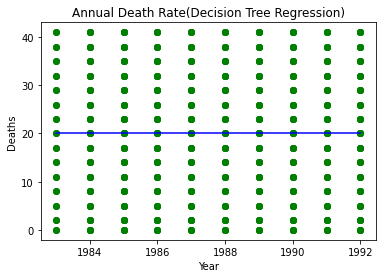

In [102]:
x_grid = np.arange(min(x), max(x), 0.01)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x, y, color = 'green')
plt.plot(x_grid, regressor.predict(x_grid), color = 'blue')
plt.title('Annual Death Rate(Decision Tree Regression)')
plt.xlabel('Year')
plt.ylabel('Deaths')
plt.show()

RANDOM FOREST REGRESSION

In [103]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x, y)

RandomForestRegressor(n_estimators=10, random_state=0)

PREDICTING NEW RESULT

In [104]:
regressor.predict([[1993]])

array([20.03545791])

In [105]:
regressor.predict([[1995]])

array([20.03545791])

In [106]:
regressor.predict([[2000]])

array([20.03545791])

VISUALISING THE RESULT

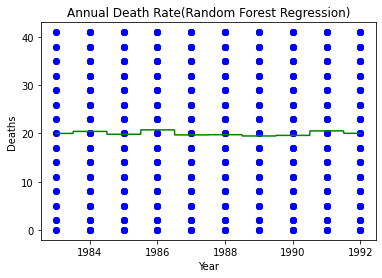

In [107]:
x_grid = np.arange(min(x), max(x), 0.01)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x, y, color = 'blue')
plt.plot(x_grid, regressor.predict(x_grid), color = 'green')
plt.title('Annual Death Rate(Random Forest Regression)')
plt.xlabel('Year')
plt.ylabel('Deaths')
plt.show()